In [ ]:
!git clone -v https://github.com/rubiaek/coincidence_statistics.git

# General
Hi Amir! 

it was very nice to use the statistical analysis tools studied and practiced in the course to get better and more precise answers for a real project which is part of Ronen's master's thesis :) We hope that it is put together well enough so that other students might find this useful and fun, and are inspired to use these kinds of methods in whatever field they pursue. Thanks again for a nice and interesting semeter.

Yuval & Ronen.

# Question - statistics of coincidence measurements 
Spontaneous Parametric Down Conversion (SPDC) is an optical non-linear process, generating spatially entangled pairs of twin photons. In many cases in quantum optics, we would like to measure the spatial correlation between these twin photons, answering the question: Given that one photon is at location $\vec{r}$, what is the probability of finding the second twin at $\vec{r'}$? 

In order to do this, one uses two single photon detectors, and recording within an integration time of $t$ seconds, counts the number of single photons that arrived at detector #1 ($s_1$), and the number of photons that arrived at detector #2 ($s_2$). To measure the coincidence counts ($c$), we want to count only twin photons that are an entangled pair. Since they are created at the same time, we expect them to arrive simultaneously. For this reason we choose a coincidence window ($w$), typically of a few nano-seconds, and count the arrivals of photons at both detectors with less than this time window between arrivals. We typically work in a regime where there are far more single counts than coincidences, originating in other optical modes. Additionally, all rates are typically slower than the dead time of the detector (minimal possible time between measurements), so we can neglect this feature. 

## a) accidental counts 
Given that detector #1 collects a photon, light can reach detector #2 either from the twin photon, which is the signal we want to measure, but can also originate from a variety of other processes: dark thermal counts in the detector, stray background light, or light originating in other optical modes of SPDC, all of which are not the twin photon, and we would like to subtract these *accidental counts* from the coincidence signal. In this experiment the photons propagate through a multimode fiber (MMF) which mixes between the optical modes, and for different measurements with different mechanical conigurations of the MMF we measure different counts for $s1$, $s2$, and $c$. 


### 1) Observe occurence of accidentals 
Obtain from the given dataset the "single1s", "single2s" and "coincidences" variables, and plot their histograms. Also obtain "integration_time" and "coin_window" for further use. 

"single1s" ("single2s") describes the mean number of photons that were detected per second at detector #1(2) in a given measurement, and similarly, "coincidences" describes the mean number of coincidence events measured per second. The total length of the measurement is given by "integration_time". Notice that $c$ and $s_1$ ($s_2$) are highly correlated. These correlations shows us that many of the coincidence counts measured originate statistically from the fact that there are many photons in the system and not from the quantum correlations, so the amount of coincidence counts is correlated to the single counts. Quantify these correlations using the Pearson correlation.

### 2) Calculate and subtract the accidentals 
Model the photons arriving at each detector "by accident" as uncorrelated Poisson processes, and calculate the expected number of accidental counts given these parameters. Give an analytical explanation, and verify it by simulating the process with a Gillespie simulation.

When you are done, subtract the expected accidentals from the measured coincidences, and plot again the histogram, this time of the "real" coincidence counts. 

## b) Negative coincidence values 
In the histogram you plotted in the previous question you should notice that there are negative values. This originates from the fact that the expected value for accidentals is sometimes too big, and the real coincidence counts could be low, so statistically we sometimes over-estimate the accidental values. These negative values are not physical. Say you want to plot the histogram in log scale - how would you plot it? Additionally - how can one improve the measurement so to get rid of most of these negative counts? 

## c) Estimation of number of modes
We now want to analyze the histogram of coincidence counts. In the ideal case of photons which are monochromatic, polarized, and with a single spatial mode, the coincidence counts for different MMF configurations should obey Rayleigh statistics, with intensities following an exponential distribution. When there are many (spatial, spectral, or polarization) modes it is as though we sum non-coherently many exponential distributions and we expect the (real) coincidence counts to follow a gamma distribution.

### 1) Fit histogram directly 
In a) we ploted a histogram of the real coincidence counts. Try fitting the histogram directly to a gamma distribution, and get an estimation for the number of modes in the system. 


### 2) Fit using contrast 
From the statistics of the coincidence counts we can also calculate the contrast which is defined as $C = \frac{std(c)}{mean(c)}$. Show that for a sum of $N$ uncorrelated incoherent exponential distributions the contrast is $C=\frac{1}{\sqrt{N}}$ both in theory and in simulation. Then calculate the contrast for the real coincidence counts, and extract an estimation for the number of modes. Compare this estimation to the number of modes calculated in the previous section. 

### 3) Shot noise affecting the contrast 
We said we expect the coincidences to obey a gamma distribution. However, 
on top of this, we also have shot noise since we are in the single photons regime. Given a value $M$ from the gamma distribution, we now have noise which goes like $\sqrt{M}$, as a Poisson process. Create a simulation checking how the shot noise affects the contrast, and hence our ability to estimate the number of modes given a set of measurements. 


# Answer
## a) 
### 1) 

We load the data and plot the histogrmans:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('./coincidence_statistics/coincidence_statistics2.npz', allow_pickle=True)
data = data['arr_0'].item()  # Something weird happened in the saving process
s1 = data['single1s']
s2 = data['single2s']
c = data['coincidences']
coin_window = data['coin_window']
integration_time = data['integration_time']

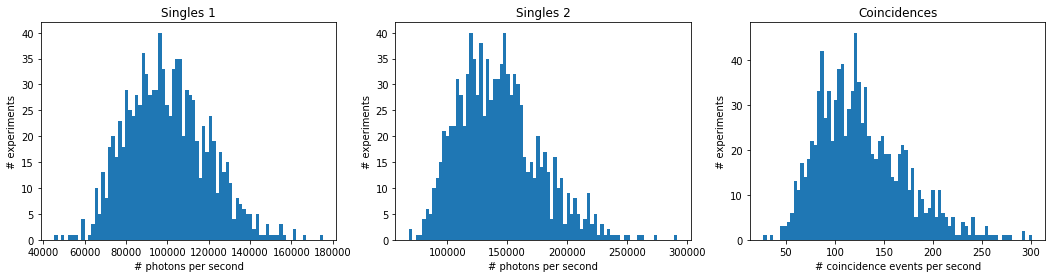

In [4]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 4))
axs[0].hist(s1, bins=80)
axs[0].set_title('Singles 1')
axs[0].set_xlabel('# photons per second')
axs[0].set_ylabel('# experiments')
axs[1].hist(s2, bins=80)
axs[1].set_title('Singles 2')
axs[1].set_xlabel('# photons per second')
axs[1].set_ylabel('# experiments')
axs[2].hist(c, bins=80)
axs[2].set_title('Coincidences')
axs[2].set_xlabel('# coincidence events per second')
axs[2].set_ylabel('# experiments')
fig.show()

To qunatify the similarity between the coincidence and single counts measurements we normalize the event counts by their mean, and put them one on top of the other. Then use the Pearson correlation coefficient ($PCC$) between them, where a perfect correlation should give $PCC=1$. 

PCC between s1 and c: 0.71
PCC between s2 and c: 0.82
PCC between s1 and s2: 0.22


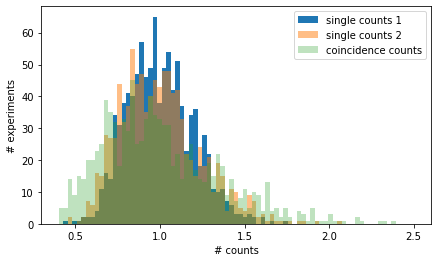

In [5]:
n_s1 = s1 / s1.mean()
n_s2 = s2 / s2.mean()
n_c = c / c.mean()
fig, ax = plt.subplots(figsize=(7, 4))
bins = np.linspace(0.4, 2.5, 80)

counts_s1, bins, patches = ax.hist(n_s1, bins=bins, alpha=1, label='single counts 1')
counts_c, bins, patches = ax.hist(n_s2, bins=bins, alpha=0.5, label='single counts 2')
counts_c, bins, patches = ax.hist(n_c, bins=bins, alpha=0.3, label='coincidence counts')

ax.set_xlabel('# counts')
ax.set_ylabel('# experiments')
ax.legend()
fig.show()

# PCC calculation
def PCC(v1, v2):
  numerator = np.sum((v1 - np.mean(v1)) * (v2 - np.mean(v2)))

  A = (v1 - np.mean(v1))**2
  B = (v2 - np.mean(v2))**2
  denominator = np.sqrt(np.sum(A) * np.sum(B))
  PCC = numerator / denominator
  return PCC

print(f"PCC between s1 and c: {PCC(n_s1, n_c):.2f}")
print(f"PCC between s2 and c: {PCC(n_s2, n_c):.2f}")
print(f"PCC between s1 and s2: {PCC(n_s1, n_s2):.2f}")

The results show us that even though $s_1$ and $s_2$ are not correlated (PCC of 0.22), the coincidence counts are highly correlated both with $s_1$ (PCC of 0.71) and with $s_2$ (PCC of 0.82). This means that most of the coincidence counts originate from statistical chance and not from quantum correlations. It also makes sense that the correlation with $s_2$ is stronger, since it has more single counts (~150K as opposed to ~100K in $s_1$).

### 2) 
To understand how many accidental counts to expect per second, we consider that for each one of $s_1$ photons measured in this second, we need to ask for each of the $s_2$ photons measured in this second, what is the chance that it fell within coin_window, either before or behind it. 

Since the processes are not correlated, the chance for an accidental count per second is simply proportional to the $\text{coin_window}$, with a factor of $2$ for the first photon being either before or after the second one. 

Altogether we expect to measure accidentals according to: $acc=2\cdot s_1\cdot s_2\cdot \text{coin_window}$. Ths units work out since $acc, s_1, s_2$ have units of $1/t$ and $\text{coin_window}$ has units of time. 

Below we show a Gillespie simulation asserting these results:

In [25]:
def gillespie(rate_1, rate_2, coin_window, integration_time, seed=None):
  t = 0
  counts_1 = counts_2 = 0
  t_1 = t_2 = - np.inf
  coincidence_counts = 0

  rng = np.random.default_rng(seed)

  while t < integration_time:
      t += rng.exponential(1 / (rate_1 + rate_2))
      
      x = rng.random()
      if x < rate_1 / (rate_1 + rate_2):
          # Count at detector 1
          counts_1 += 1
          t_1 = t
      else:
          # Count at detector 2
          counts_2 += 1
          t_2 = t
      
      if np.abs(t_1 - t_2) < coin_window:
          coincidence_counts += 1
          # Coincident photons caught, reset timers
          t_1 = t_2 = - np.inf 
          # each photon can be counted for only one coincidence event
  
  counts_1 = counts_1 / integration_time
  counts_2 = counts_2 / integration_time
  coincidence_counts = coincidence_counts / integration_time
  
  print(f'Expected coincidence counts: {2*counts_1*counts_2*coin_window:.1f}')
  print(f'Actual coincidence counts: {coincidence_counts}')

gillespie(100e3, 150e3, coin_window, integration_time, seed=12345)
print('-------------------------------------')
gillespie(200e3, 150e3, coin_window, integration_time, seed=12345)
print('-------------------------------------')
gillespie(200e3, 150e3, coin_window*2, integration_time, seed=12345)

Expected coincidence counts: 120.0
Actual coincidence counts: 125.6
-------------------------------------
Expected coincidence counts: 239.8
Actual coincidence counts: 242.0
-------------------------------------
Expected coincidence counts: 479.6
Actual coincidence counts: 473.2


And we see that the analytical expression we came up with agrees well with the Gillespie simulation.

We can now subtract from each coincidence measurement the expected accidental counts to arrive at a good approximation for the actual "real" coincidence counts, and plot it's histogram. 

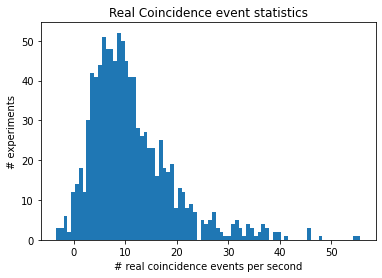

In [7]:
real_coin = c - 2*s1*s2*coin_window

fig, ax = plt.subplots()
ax.hist(real_coin, bins=80)
ax.set_title('Real Coincidence event statistics')
ax.set_xlabel('# real coincidence events per second')
ax.set_ylabel('# experiments')
fig.show()

We also note that when subtracting $2\cdot s1\cdot s2\cdot\text{coin_window}$ we neglect the actual entangled photons which don't originate from uncorrelated Poisson processes. This is OK since we are working in a regime where the number of single counts is much larger than the number of coincidence events. 

WE can also show that now the histogram of coincidence counts are now less correlated with the single counts: 

In [27]:
n_real_c = real_coin / real_coin.mean()

print(f"PCC between s1 and real_coin: {PCC(n_s1, n_real_c):.2f}")
print(f"PCC between s2 and real_coin: {PCC(n_s2, n_real_c):.2f}")

PCC between s1 and real_coin: 0.37
PCC between s2 and real_coin: 0.49


## b) 
In order to plot something similar to log scale, and take care of negative values, one can use a $\sinh^{-1}$ transform, since for large values $\sinh$ scales like an exponent (so $\sinh^{-1}$ is similar to $\log$), and $\sinh^{-1}$ is defined also for negative values. We show this below. We also note that in our case we don't really need this, since our values are all within the same two orders of magnitude and therefore using a linear scale is sufficient.


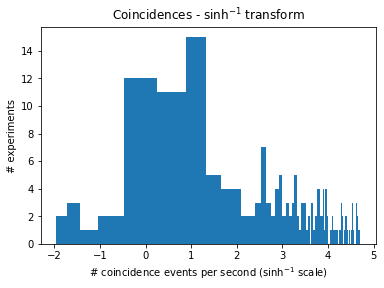

In [16]:
fig, ax  = plt.subplots()
counts, bins, patches = ax.hist(real_coin, bins=np.arcsinh(np.linspace(real_coin.min(), real_coin.max(), 80)))
ax.set_title('Coincidences - $\sinh^{-1}$ transform')
ax.set_xlabel('# coincidence events per second ($\sinh^{-1}$ scale)')
ax.set_ylabel('# experiments')
fig.show()

The negative values originate from the subtraction of the accidental counts. To experimentally get less of these negative counts one can try and reduce the coincidence window, so that there will be less accidental counts (without hurting the real coincidence counts). This however is limited to the finite jitter in the detectors. Another approach would be to measure with a longer integration time, since the longer the integration time the closer the statistical estimation will be to the actual value of accidental counts, so we are less likely to "overshoot" and get negative values. 

## c)
### 1)

We try and fit our histogram of real coincidence counts to the *gamma* distibution, with free parameters of the number of modes $N$ and the mean power per mode $I_0$: 

$$p\left(I\right)=\frac{I^{N-1}}{\Gamma\left(N\right)I_{0}^{N}}\exp\left(-\frac{I}{I_{0}}\right)$$

And obtain from the fit values of $N=2.6\pm 0.1$ and $I_0=4.4 \pm 0.2$. This fits well with the fact that in the gamma distribution the mean value should be $N \cdot I_0=11.4\pm0.6$ which is close to $mean(\textrm{real_coin})=11.24\pm 0.3$ (uncertainty goes like $std(\textrm{real_coin})/\sqrt{N}$ for $N$ measurements).

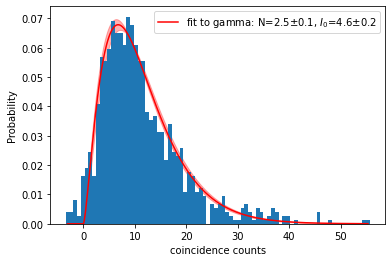

In [33]:
from scipy.optimize import curve_fit
from scipy.special import gamma
import warnings
warnings.filterwarnings("ignore")

def gamma_pdf(I, N, I_0):
    ans = ((I**(N-1)) / (gamma(N)*I_0**N)) * np.exp(-I/I_0)
    ans[I < 0] = 0
    return ans


fig, ax = plt.subplots()
counts, bins, patches = ax.hist(real_coin, bins=80, density=True)
X = bins[:-1] + np.diff(bins) / 2  # middle of bins

popt, pcov = curve_fit(gamma_pdf, X, counts, bounds=(0.01, np.inf), p0=(2, 5))
N, I_0 = popt
N_err, I_0_err = np.sqrt(pcov.diagonal())

XX = np.linspace(X[0], X[-1], 500)
ax.plot(XX, gamma_pdf(XX, N, I_0), 'r-', label=f'fit to gamma: N={N:.1f}$\pm${N_err:.1f}, $ I_0 $={I_0:.1f}$\pm${I_0_err:.1f}')
ax.fill_between(XX, gamma_pdf(XX, N+N_err, I_0), gamma_pdf(XX, N-N_err, I_0), color='r', alpha=0.3)
ax.legend()
ax.set_xlabel('coincidence counts')
ax.set_ylabel('Probability')
fig.show()

## 2)
The variance of an exponential distribution with mean $\lambda$ is $\lambda^2$, so the contrast for $N=1$ is $C=\frac{\sqrt{\lambda^{2}}}{\lambda}=1$. The variance of a sum of independent random variables is the sum of their respectful variances, and the same is true for their mean. Therfore the contrast for a sum of $N$ modes will be $C=\frac{\sqrt{N\cdot\lambda^2}}{N\lambda}=\frac{1}{\sqrt{N}}$ as expected. 

We show this further also in simulation: 

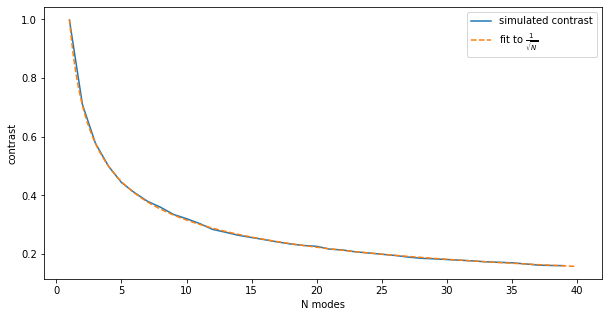

In [39]:
def contrast_from_N_modes(N_samples, N_modes):
    samples = np.zeros(N_samples)
    for i in range(N_modes):
        samples += np.random.exponential(size=N_samples)

    return samples.std() / samples.mean()

fig, ax = plt.subplots(figsize=(10, 5))
Ns = np.arange(1, 40)
contrasts = [contrast_from_N_modes(10000, N) for N in Ns]
ax.plot(Ns, contrasts, label='simulated contrast')
XX = np.linspace(1, 40, 10000)
ax.plot(XX, 1/np.sqrt(XX), '--', label=r'fit to $\frac{1}{\sqrt{N}}$')
ax.set_xlabel("N modes")
ax.set_ylabel("contrast")
ax.legend()
fig.show()


So we now calculate the contrast from the data, and from there the expected number of modes (using again linear error propagation), and arrive at: $N=1.86\pm 0.1$. (The previous method gave us $2.6\pm 0.1$.)

In [ ]:
contrast = real_coin.std() / real_coin.mean()
N = real_coin.size
contrast_err = contrast * np.sqrt(1/(2*N-2) + (contrast**2)/N)
print(f'contrast is: {contrast:.2f}+-{contrast_err:.2f}')

N_speckles = 1/contrast**2
N_speckles_err = contrast_err*2*contrast**(-3)
print(f'N_speckles is: {N_speckles:.2f}+-{N_speckles_err:.1f}')

contrast is: 0.73+-0.02
N_speckles is: 1.86+-0.1


Both methods give close answers, but given their uncertainties they do not agree. An advantage of the first method is that it tries to fit the whole distribution, and not only a single number coming from the first two moments. A disadvantage of the first method is that it takes into account to some extent the non-physical negative values, while the second method sort of averages them out. to better understand the discrepency, we annalyze the shot noise in the next part, and hope that it will rectify the two methods to some extent. 

### 3) 
Now we want to take into account the shot noise in the measurement. Intuitively if we start with a constant signal with $C=0$, we expect the added noise to make the contrast larger. However, also intuitively, if we start with a $\delta$-function signal with a very large contrast, we expect the added noise to make the contrast smaller (since physically the signal is positive). So we might have here some interesting dynamics. 

However, from the simulation (which takes a subspace of options that begin with gamma statistics) it seems that the shot noise always makes the contrast larger: 

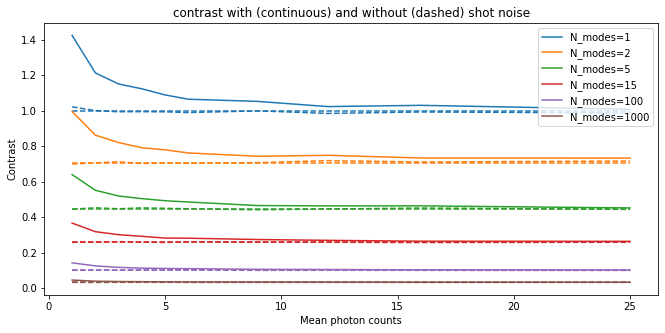

In [40]:
def contrast_gamma_with_shot_noise(N_modes, I_0):
    N_samples = 10000
    samples = np.zeros(N_samples)
    for i in range(N_modes):
        samples += np.random.exponential(scale=I_0, size=N_samples)

    noisy_samples = np.zeros(N_samples)
    for i, sample in enumerate(samples):
        noisy_samples[i] = np.random.poisson(sample)

    return noisy_samples.std() / noisy_samples.mean(), samples.std() / samples.mean()


fig, ax = plt.subplots(figsize=(11, 5))
I_0s = [1, 2, 3, 4, 5, 6, 9, 12, 16, 25]
for N_modes in [1, 2, 5, 15, 100, 1000]:
    noisy_contrasts = []
    no_noise_contrasts = []
    for I_0 in I_0s:
        noisy_contrast, no_noise_contrast = contrast_gamma_with_shot_noise(N_modes, I_0)
        noisy_contrasts.append(noisy_contrast)
        no_noise_contrasts.append(no_noise_contrast)

    Q = ax.plot(I_0s, noisy_contrasts, label=f'N_modes={N_modes}')
    ax.plot(I_0s, no_noise_contrasts, '--', color=Q[0].get_color())
    ax.plot(I_0s, np.ones_like(I_0s)/np.sqrt(N_modes), '--', color=Q[0].get_color())

ax.set_title('contrast with (continuous) and without (dashed) shot noise')
ax.set_xlabel('Mean photon counts')
ax.set_ylabel('Contrast')
ax.legend()
fig.show()

We see that the shot noise always makes the contrast higher (predicting a lower $N$). The main part of this effect dies out as the mean photon count reaches $\approx 9$, so when the sound to noise ratio (SNR) is 3. However in our actuall measurements we need to take into account the shot noise originating also from the accidentals! 

So even though our mean $\textrm{real_coin}$ rate is $\approx 11 \frac{1}{\textrm{sec}}$, our total coincidence counts mean is $\approx 126 \frac{1}{\textrm{sec}}$. However, to calculate the SNR we need to take into account also the integration time, which here was $10$ seconds, so the signal is ten times the mean real coincidence counts, and the noise is the shot noise of ten times the mean total coincidence counts. 

All together in our meaurements we arrive at a SNR that is on average $\approx \frac{10\cdot11}{\sqrt{10\cdot126}}\approx3$, which in the simulation corresponds to mean photons counts of $9$ (since $\sqrt{9}=3$). We also have  approximately $N=2$ modes, and in this case the simulation teaches us that there is still a small yet non-zero effect of the shot noise. This can explain at least part of the difference between the two methods used in 1) and 2) to estimate the number of modes (the shot noise changes the contrast from 0.7 to 0.75 and $\frac{1}{0.7^2}\approx2.04$, while $\frac{1}{0.75^2}\approx1.77$.). 

To summarize, it seems that to get a good estimation for the number of modes it is probably more useful to fit the whole distribution rather than using the contrast, and this is actually useful for my research! 